In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle 
import pandas as pd
from datetime import date
from sklearn.cluster import KMeans

from IPython.display import HTML
from matplotlib import animation, rc
from matplotlib import style
#rc('animation', html='html5')

from datetime import datetime

import sys
sys.path.append('./../')
from utility.eval_metric import _measure_metric,accuracy

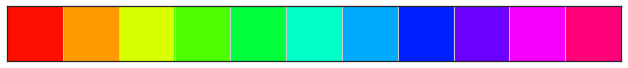

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
#sns.set_style('whitegrid')
import matplotlib
plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

#current_palette = sns.color_palette(sns.hls_palette(5+1, l=.6, s=1.0))
current_palette = sns.color_palette(sns.hls_palette(10+1, l=.5, s=1.0))
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [3]:
saved_pickle_path = './result_pickle/'
format_name = '.pickle'

In [4]:
def get_together(saved_pickle_path, saved_filename1, saved_filename2, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    with open(saved_pickle_path + saved_filename2 + format_name, 'rb') as f:
        result_pickle2 = pickle.load(f) # 단 한줄씩 읽어옴       
    result_pickle = {}
    result_pickle['train_elbo'] = result_pickle1['train_elbo'] + result_pickle2['train_elbo']
    result_pickle['train_accuracy'] = result_pickle1['train_accuracy'] + result_pickle2['train_accuracy']
    result_pickle['test_elbo'] = result_pickle1['test_elbo'] + result_pickle2['test_elbo']
    result_pickle['test_accuracy'] = result_pickle1['test_accuracy'] + result_pickle2['test_accuracy']
    result_pickle['test_pred'] = result_pickle1['test_pred'] + result_pickle2['test_pred']
    result_pickle['Trained_Model'] = result_pickle1['Trained_Model'] + result_pickle2['Trained_Model']
    result_pickle['train_time'] = result_pickle1['train_time'] + result_pickle2['train_time']
    result_pickle['num_cluster_list'] = result_pickle1['num_cluster_list'] + result_pickle2['num_cluster_list']
    result_pickle['test_elbo_before'] = result_pickle1['test_elbo_before'] + result_pickle2['test_elbo_before']
    result_pickle['test_accuracy_before'] = result_pickle1['test_accuracy_before'] + result_pickle2['test_accuracy_before']
    result_pickle['Data_setting'] = result_pickle1['Data_setting']
    result_pickle['Exp_setting'] = result_pickle1['Exp_setting']
    result_pickle['HMMGP_setting'] = result_pickle1['HMMGP_setting']
    result_pickle['Exp_setting']['num_rep_exp'] = result_pickle1['Exp_setting']['num_rep_exp']  + result_pickle2['Exp_setting']['num_rep_exp'] 
    #return result_pickle1, result_pickle2
    return result_pickle

In [5]:
def get_result(saved_pickle_path, saved_filename1, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1
    

In [6]:
result_pickle1.keys()

NameError: name 'result_pickle1' is not defined

In [7]:
train_elbo_mean,train_elbo_std = np.asarray(result_pickle1['loglik_list'])[:,:,0].mean(axis = 0),np.asarray(result_pickle1['loglik_list'])[:,:,0].std(axis = 0).round(3)

NameError: name 'result_pickle1' is not defined

In [9]:
# num_digit=3
# np.asarray(result_pickle1['loglik_list']).shape
# #np.asarray(result_pickle1['train_time']).std().round(4)

In [60]:
def get_static(result_pickle_name):
    num_digit=3

    num_train,num_test = len(result_pickle_name['Data_setting']['x_train']),len(result_pickle_name['Data_setting']['x_test'])
    loglik_list = np.asarray(result_pickle1['loglik_list'])
    
    
#     test_accuracy = np.asarray(result_pickle_name['test_accuracy'])
#     test_accuracy_before = np.asarray(result_pickle_name['test_accuracy_before'])
#     test_elbo_before = np.asarray(result_pickle_name['test_elbo_before'])
#     test_elbo = np.asarray(result_pickle_name['test_elbo'])

#     train_accuracy = []
#     training_elbo = []
#     running_time = []
#     avg_EM_running_time_per_iteration = []
#     avg_training_cluster_num = []
#     for num_exp_idx in range(result_pickle_name['Exp_setting']['num_rep_exp']):
#         running_time.append(result_pickle_name['train_time'][num_exp_idx].sum())
#         avg_EM_running_time_per_iteration.append(result_pickle_name['train_time'][num_exp_idx].mean())
#         avg_training_cluster_num.append(result_pickle_name['num_cluster_list'][num_exp_idx][-1])
#         training_elbo.append(result_pickle_name['train_elbo'][num_exp_idx][-1])
#         train_accuracy.append(result_pickle_name[ 'train_accuracy'][num_exp_idx][-1])
#     running_time = np.asarray(running_time)
#     avg_EM_running_time_per_iteration = np.asarray(avg_EM_running_time_per_iteration)
#     avg_training_cluster_num = np.asarray(avg_training_cluster_num)
#     training_elbo = np.asarray(training_elbo)
#     test_elbo = np.asarray(test_elbo)

#     nor_training_elbo = np.asarray(training_elbo)/num_train
#     nor_test_elbo = np.asarray(test_elbo)/num_test
#     train_accuracy = np.asarray(train_accuracy)
    
    
    train_acc_mean,train_acc_std = np.asarray(result_pickle_name['train_accuracy_list']).mean(axis=0).round(num_digit),np.asarray(result_pickle_name['train_accuracy_list']).std(axis=0).round(num_digit)
    test_acc_mean,test_acc_std = np.asarray(result_pickle_name['test_accuracy_list']).mean(axis=0).round(num_digit),np.asarray(result_pickle_name['test_accuracy_list']).std(axis=0).round(num_digit)
    ncluster_mean, ncluster_std = np.asarray(result_pickle_name['num_cluster_list']).mean(axis=0).round(num_digit),np.asarray(result_pickle_name['num_cluster_list']).std(axis=0).round(num_digit)

    train_elbo_mean,train_elbo_std = np.asarray(result_pickle_name['loglik_list'])[:,:,0].mean(axis = 1).round(num_digit),np.asarray(result_pickle_name['loglik_list'])[:,:,0].std(axis = 1).round(num_digit)
    train_lik_mean,train_lik_std = np.asarray(result_pickle_name['loglik_list'])[:,:,1].mean(axis = 1).round(num_digit),np.asarray(result_pickle_name['loglik_list'])[:,:,1].std(axis = 1).round(num_digit)
    test_elbo_mean,test_elbo_std = np.asarray(result_pickle_name['loglik_list'])[:,:,2].mean(axis = 1).round(num_digit),np.asarray(result_pickle_name['loglik_list'])[:,:,2].std(axis = 1).round(num_digit)
    test_lik_mean,test_lik_std = np.asarray(result_pickle_name['loglik_list'])[:,:,3].mean(axis = 1).round(num_digit),np.asarray(result_pickle_name['loglik_list'])[:,:,3].std(axis = 1).round(num_digit)
    
    train_time_mean,train_time_std= np.asarray(result_pickle1['train_time']).mean().round(num_digit),np.asarray(result_pickle1['train_time']).std().round(num_digit) 
    
    print('#'*100)
    #HMMGP_setting,Exp_setting
    print(result_pickle_name['Exp_setting'])
    print(result_pickle_name['HMMGP_setting'])
    
    print('full batch : %d  '%(result_pickle_name['Exp_setting']['full_length']))
    print('len batch : %d  '%(result_pickle_name['HMMGP_setting']['Len_Batch']))
    print('')
    #print('running_time             \t mean : %.2f     std : %.2f '%(running_time.mean(),running_time.std()) ) 
    print('Avg_EM_running_time      \t mean : %.2f     std : %.2f '%(train_time_mean,train_time_std  ))
    print('')
    #print('Af Train cluster_accuracy   \t mean : %.2f     std : %.2f '%(train_accuracy.mean(),train_accuracy.std() ))
    print('Be Test cluster_accuracy  \t mean : %.2f     std : %.2f '%(test_acc_mean[0],test_acc_std[0] )) 
    print('Af Test cluster_accuracy  \t mean : %.2f     std : %.2f '%(test_acc_mean[-1],test_acc_std[-1]  )) 
    print('')
    print('Be Test elbo               \t mean : %.2f      std : %.2f '%(test_elbo_mean[0],test_elbo_std[0] ))
    print('Af Test elbo               \t mean : %.2f      std : %.2f '%(test_elbo_mean[-1],test_elbo_std[-1]  ))
    print('')
    print('Be Test lik               \t mean : %.2f      std : %.2f '%(test_lik_mean[0],test_lik_std[0] ))
    print('Af Test lik               \t mean : %.2f      std : %.2f '%(test_lik_mean[-1],test_lik_std[-1]  ))
    print('')
    
    print('Training cluster_num    \t mean : %.2f      std : %.2f '%(ncluster_mean[-1], ncluster_std[-1]   )) 
    # print('')
    # print('Training elbo           \t mean : %.2f      std : %.2f '%(training_elbo.mean(),training_elbo.std()))
    # print('Test elbo               \t mean : %.2f      std : %.2f '%(test_elbo.mean(),test_elbo.std()))
    # print('Nor Training elbo       \t mean : %.2f      std : %.2f '%(nor_training_elbo.mean(),nor_training_elbo.std()))
    # print('Nor Test elbo           \t mean : %.2f      std : %.2f '%(nor_test_elbo.mean(),nor_test_elbo.std()))
    print('')

    return train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,\
           train_elbo_mean,train_elbo_std,test_elbo_mean,test_elbo_std,\
           train_lik_mean,train_lik_std,test_lik_mean,test_lik_std,\
           ncluster_mean, ncluster_std, train_time_mean,train_time_std

def get_info(result_pickle_list):
    xtick_list = []
    y_train_elbo_mean_list = []
    y_train_elbo_std_list = []
    y_train_accuracy_mean_list = []
    y_train_accuracy_std_list = []
    train_time_mean_list = []
    num_cluster_mean_list = []
    num_cluster_std_list = []
    
    for ith_result_pickle in result_pickle_list:
#         xtick = np.arange(result_pickle['HMMGP_setting']['Iter_train'])
#         y_train_elbo_mean = np.asarray(result_pickle['train_elbo']).mean(axis = 0)
#         y_train_elbo_std = np.asarray(result_pickle['train_elbo']).std(axis = 0)
#         y_train_accuracy_mean = np.asarray(result_pickle['train_accuracy']).mean(axis = 0)
#         y_train_accuracy_std = np.asarray(result_pickle['train_accuracy']).std(axis = 0)
#         train_time_mean = np.asarray(result_pickle['train_time']).cumsum(axis = 1).mean(axis = 0)
#         num_cluster_mean = np.asarray(result_pickle['num_cluster_list']).mean(axis = 0)
#         num_cluster_std = np.asarray(result_pickle['num_cluster_list']).std(axis = 0)
        
        xtick = np.arange(ith_result_pickle['HMMGP_setting']['Iter_train'])
        
        train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,\
        train_elbo_mean,train_elbo_std,test_elbo_mean,test_elbo_std,\
        train_lik_mean,train_lik_std,test_lik_mean,test_lik_std,\
        ncluster_mean, ncluster_std, train_time_mean,train_time_std = get_static(ith_result_pickle)    
        
        
        train_time_mean = np.asarray(ith_result_pickle['train_time']).cumsum(axis = 1).mean(axis = 0)
        
        xtick_list.append(xtick)
        y_train_elbo_mean_list.append(train_elbo_mean)
        y_train_elbo_std_list.append(train_elbo_std)
        y_train_accuracy_mean_list.append(train_acc_mean)
        y_train_accuracy_std_list.append(train_acc_std)
        train_time_mean_list.append(train_time_mean)
        num_cluster_mean_list.append(ncluster_mean)
        num_cluster_std_list.append(ncluster_std)

    return xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list


## Exp high sampling rrff

In [61]:
#saved_filename = 'datadigit_jackson_Hz1-500_fulllen100_emissiongprrff_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numhypiter10_numQ10_numspectralpttotal102_numbatchrrff1_repetitiveexp2'
#saved_filename = 'datadigit_jackson_Hz1-500_fulllen100_emissiongprrff_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numhypiter10_numQ10_numspectralpttotal102_numbatchrrff1_repetitiveexp2'



#saved_filename = 'datadigit_jackson_Hz1-500_fulllen100_emissiongprrff_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numhypiter10_numQ4_numspectralpttotal102_numbatchrrff1_repetitiveexp1'

saved_filename = 'datadigit_v2_T4096_jackson_Hz0-511_13579_fulllen100_emissiongprrff_beta_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numhypiter10_numQ4_numspttotal102_numbatchrrff1_repetitiveexp2'
result_pickle1 = get_result(saved_pickle_path, saved_filename,  format_name)



In [62]:

# result_pickle1 = get_result(saved_pickle_path, saved_filename1,  format_name)
# # result_pickle2 = get_result(saved_pickle_path, saved_filename2,  format_name)
# # result_pickle3 = get_result(saved_pickle_path, saved_filename3,  format_name)
# # result_pickle4 = get_result(saved_pickle_path, saved_filename4,  format_name)
# # result_pickle5 = get_result(saved_pickle_path, saved_filename5,  format_name)
# # result_pickle6 = get_result(saved_pickle_path, saved_filename6,  format_name)
# # result_pickle7 = get_result(saved_pickle_path, saved_filename7,  format_name)
# # result_pickle8 = get_result(saved_pickle_path, saved_filename8,  format_name)
# # result_pickle9 = get_result(saved_pickle_path, saved_filename9,  format_name)
# # result_pickle10 = get_result(saved_pickle_path, saved_filename10,  format_name)
# # result_pickle11 = get_result(saved_pickle_path, saved_filename11,  format_name)



In [63]:
# result_pickle1['test_accuracy']

In [64]:
train_acc_mean,test_acc_std,test_acc_mean,test_acc_std,\
train_elbo_mean,train_elbo_std,test_elbo_mean,test_elbo_std,\
train_lik_mean,train_lik_std,test_lik_mean,test_lik_std,\
ncluster_mean, ncluster_std, train_time_mean,train_time_std = get_static(result_pickle_name=result_pickle1)
# get_static(result_pickle_name=result_pickle2)
# get_static(result_pickle_name=result_pickle3)
# get_static(result_pickle_name=result_pickle4)
# get_static(result_pickle_name=result_pickle5)
# get_static(result_pickle_name=result_pickle6)
# get_static(result_pickle_name=result_pickle7)



####################################################################################################
{'num_rep_exp': 2, 'data': 'digit_v2_T4096_jackson_Hz0-511_13579', 'full_length': 100, 'input_dim': 1, 'Num_Q': 4, 'Num_HiddenState': 5, 'device': False, 'input_length': 1024}
{'emission': 'gprrff_beta', 'train': 'SVI', 'Num_Q': 4, 'lr_A': 0.05, 'lr_pi': 0.05, 'lr_hyp': 0.001, 'Len_Full': 100, 'Len_Batch': 10, 'Num_Batch': 1, 'device': False, 'Iter_train': 20, 'Iter_hyp': 10, 'Num_RRFFBatch': 1, 'Num_K_Emission': 2, 'Rate_RRFFSpectralPt': 0.1, 'Num_RRFFSpectralPt_total': 102}
full batch : 100  
len batch : 10  

Avg_EM_running_time      	 mean : 1.14     std : 0.01 

Be Test cluster_accuracy  	 mean : 0.39     std : 0.03 
Af Test cluster_accuracy  	 mean : 0.44     std : 0.06 

Be Test elbo               	 mean : -60057914.93      std : 799332.34 
Af Test elbo               	 mean : -58803522.03      std : 815104.51 

Be Test lik               	 mean : -52819451.74      std : 788255.03 

In [65]:
save_figure_path = './result_fig/exp3/'
try : 
    os.makedirs(save_figure_path) if ~os.path.exists(save_figure_path) else 1
except:
    pass

In [66]:
# # result_pickle_list = [result_pickle1,result_pickle3,result_pickle5]
# # xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# # label_list = [ 'SVI Q=4', 'rrff Q=4,R=.2', 'rrff Q=5,R=.2']
# # color_list = [0,1,4,7,10]

# # result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
# # xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# # label_list = [ 'SVI Q=4', 'rrff Q=4,R=.1', 'rrff Q=4,R=.2']
# # color_list = [0,1,4,7,10]

# result_pickle_list = [result_pickle1,result_pickle2,result_pickle3,result_pickle4,result_pickle5]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# #label_list = [ 'SVI Q=4', 'rrff Q=4,R=.1', 'rrff Q=4,R=.2', 'rrff Q=5,R=.1', 'rrff Q=5,R=.2']
# label_list = [ 'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2','SVI-SM-RF L=10,Q=5,R=0.1','SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [0,1,4,7,10,13,15]



# # result_pickle_list = [result_pickle1,result_pickle2,result_pickle3,result_pickle4,result_pickle5]
# # xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list  =  get_info(result_pickle_list)
# # label_list = [ 'SVI Q=4', 'rrff Q=4,R=.1', 'rrff Q=4,R=.2','rrff Q=5,R=.1', 'rrff Q=5,R=.2']


In [67]:
# figsiz = (6,4) 
# labelsiz = 15
# fontsiz = 15
# interval = 0.2

In [68]:
# figsiz = (8,5) 
# labelsiz = 15
# fontsiz = 15
# interval = 0.2


# result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
# color_list = [0,4,7]
# fig = plt.figure(figsize = figsiz)
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# plt.xscale('log',basex=10) 
# plt.xlabel('log10 time (sec)',fontsize = 18)
# plt.ylabel('training accuracy',fontsize = 18)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# #plt.legend(loc='lower right',fontsize = 15)
# plt.legend(loc='upper left',fontsize = 12)

# fig.tight_layout()    
# plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()



# # ######################################################################################################################################################################################################################
# # ######################################################################################################################################################################################################################
# # ######################################################################################################################################################################################################################

# # result_pickle_list = [result_pickle4,result_pickle5,result_pickle6]
# # xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# # label_list = ['SVI-SM L=10,Q=5','SVI-SM-RF L=10,Q=5,R=0.1','SVI-SM-RF L=10,Q=5,R=0.2']
# # color_list = [0,4,7]
# # fig = plt.figure(figsize = figsiz)
# # for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
# #     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
# #     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
# #     plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
# #                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# # plt.xscale('log',basex=10) 
# # plt.xlabel('log10 time (sec)',fontsize = 18)
# # plt.ylabel('training accuracy',fontsize = 18)
# # plt.xticks(fontsize = 15)
# # plt.yticks(fontsize = 15)
# # #plt.legend(loc='lower right',fontsize = 15)
# # plt.legend(loc='upper left',fontsize = 12)

# # fig.tight_layout()    
# # plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# # plt.show()



# # ######################################################################################################################################################################################################################
# # ######################################################################################################################################################################################################################
# # ######################################################################################################################################################################################################################

# # result_pickle_list = [result_pickle2,result_pickle3 ,result_pickle5,result_pickle6]
# # xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# # label_list = ['SVI-SM-RF L=10,Q=4,R=0.1', 'SVI-SM-RF L=10,Q=4,R=0.2' , 'SVI-SM-RF L=10,Q=5,R=0.1', 'SVI-SM-RF L=10,Q=5,R=0.2']
# # color_list = [0,4,7,10]
# # fig = plt.figure(figsize = figsiz)
# # for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
# #     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
# #     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
# #     plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
# #                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# # plt.xscale('log',basex=10) 
# # plt.xlabel('log10 time (sec)',fontsize = 18)
# # plt.ylabel('training accuracy',fontsize = 18)
# # plt.xticks(fontsize = 15)
# # plt.yticks(fontsize = 15)
# # #plt.legend(loc='lower right',fontsize = 15)
# # plt.legend(loc='upper left',fontsize = 12)

# # fig.tight_layout()    
# # plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# # plt.show()


# # ######################################################################################################################################################################################################################
# # ######################################################################################################################################################################################################################
# # ######################################################################################################################################################################################################################

# # result_pickle_list = [result_pickle2,result_pickle5]
# # xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# # label_list = ['SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=5,R=0.1']
# # color_list = [0,4,7]
# # fig = plt.figure(figsize = figsiz)
# # for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
# #     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
# #     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
# #     plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
# #                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# # plt.xscale('log',basex=10) 
# # plt.xlabel('log10 time (sec)',fontsize = 18)
# # plt.ylabel('training accuracy',fontsize = 18)
# # plt.xticks(fontsize = 15)
# # plt.yticks(fontsize = 15)
# # #plt.legend(loc='lower right',fontsize = 15)
# # plt.legend(loc='upper left',fontsize = 12)

# # fig.tight_layout()    
# # plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# # plt.show()

# ######################################################################################################################################################################################################################
# ######################################################################################################################################################################################################################
# ######################################################################################################################################################################################################################

# result_pickle_list = [result_pickle4, result_pickle3 , result_pickle6 ]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM L=10,Q=5','SVI-SM-RF L=10,Q=4,R=0.2' ,'SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [10,7,8]
# fig = plt.figure(figsize = figsiz)
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# plt.xscale('log',basex=10) 
# plt.xlabel('log10 time (sec)',fontsize = 18)
# plt.ylabel('training accuracy',fontsize = 18)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# #plt.legend(loc='lower right',fontsize = 15)
# plt.legend(loc='upper left',fontsize = 12)

# fig.tight_layout()    
# plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()

####################################################################################################
{'num_rep_exp': 2, 'data': 'digit_v2_T4096_jackson_Hz0-511_13579', 'full_length': 100, 'input_dim': 1, 'Num_Q': 4, 'Num_HiddenState': 5, 'device': False, 'input_length': 1024}
{'emission': 'gprrff_beta', 'train': 'SVI', 'Num_Q': 4, 'lr_A': 0.05, 'lr_pi': 0.05, 'lr_hyp': 0.001, 'Len_Full': 100, 'Len_Batch': 10, 'Num_Batch': 1, 'device': False, 'Iter_train': 20, 'Iter_hyp': 10, 'Num_RRFFBatch': 1, 'Num_K_Emission': 2, 'Rate_RRFFSpectralPt': 0.1, 'Num_RRFFSpectralPt_total': 102}
full batch : 100  
len batch : 10  

Avg_EM_running_time      	 mean : 1.14     std : 0.01 

Be Test cluster_accuracy  	 mean : 0.39     std : 0.03 
Af Test cluster_accuracy  	 mean : 0.44     std : 0.06 

Be Test elbo               	 mean : -60057914.93      std : 799332.34 
Af Test elbo               	 mean : -58803522.03      std : 815104.51 

Be Test lik               	 mean : -52819451.74      std : 788255.03 

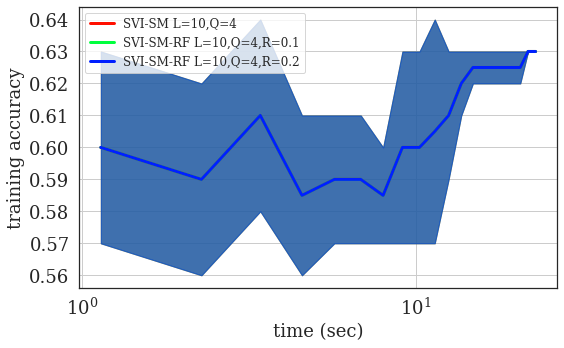

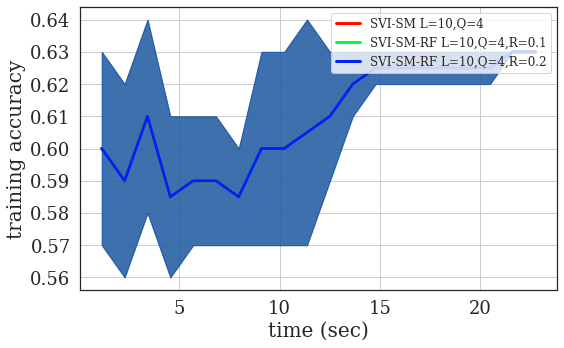

In [69]:
figsiz = (8,5) 
labelsiz = 15
fontsiz = 15
interval = 0.2


#result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
result_pickle_list = [result_pickle1,result_pickle1,result_pickle1]
xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
color_list = [0,4,7]
fig = plt.figure(figsize = figsiz)
for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
    plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
    #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
    plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 

plt.xscale('log',basex=10) 
plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel('training accuracy',fontsize =  18)
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
plt.legend(loc='upper left',fontsize = 12)

fig.tight_layout()    
plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()





fig = plt.figure(figsize = figsiz)
for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
    plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
    #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
    plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
#plt.xscale('log',basex=10) 
plt.xlabel('time (sec)',fontsize = 20)
plt.ylabel('training accuracy',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
plt.legend(loc='upper right',fontsize = 12)

fig.tight_layout()    
plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




In [70]:
ytick2

array([-11400000., -10900000., -10400000.])

No handles with labels found to put in legend.


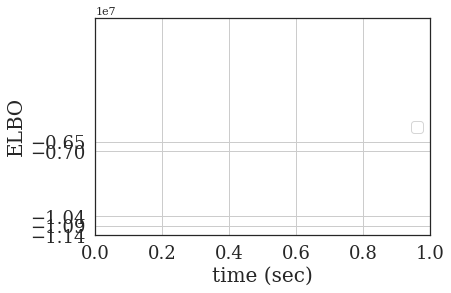

In [49]:
ytick2,ytick3 = np.arange(-1.14*1e7,-1.0*1e7,5e5),np.arange(-.7*1e7,-.6*1e7,5e5)
plt.xlabel('time (sec)',fontsize = 20)
plt.ylabel('ELBO',fontsize = 20)
plt.minorticks_off()
plt.xticks(fontsize = 18)
plt.yticks(np.concatenate([ytick2,ytick3]),fontsize = 18)
plt.legend(loc='center right',fontsize = 15)

plt.minorticks_off()


####################################################################################################
{'num_rep_exp': 2, 'data': 'digit_v2_T4096_jackson_Hz0-511_13579', 'full_length': 100, 'input_dim': 1, 'Num_Q': 4, 'Num_HiddenState': 5, 'device': False, 'input_length': 1024}
{'emission': 'gprrff_beta', 'train': 'SVI', 'Num_Q': 4, 'lr_A': 0.05, 'lr_pi': 0.05, 'lr_hyp': 0.001, 'Len_Full': 100, 'Len_Batch': 10, 'Num_Batch': 1, 'device': False, 'Iter_train': 20, 'Iter_hyp': 10, 'Num_RRFFBatch': 1, 'Num_K_Emission': 2, 'Rate_RRFFSpectralPt': 0.1, 'Num_RRFFSpectralPt_total': 102}
full batch : 100  
len batch : 10  

Avg_EM_running_time      	 mean : 1.14     std : 0.01 

Be Test cluster_accuracy  	 mean : 0.39     std : 0.03 
Af Test cluster_accuracy  	 mean : 0.44     std : 0.06 

Be Test elbo               	 mean : -60057914.93      std : 799332.34 
Af Test elbo               	 mean : -58803522.03      std : 815104.51 

Be Test lik               	 mean : -52819451.74      std : 788255.03 

ValueError: x and y must have same first dimension, but have shapes (20,) and (2,)

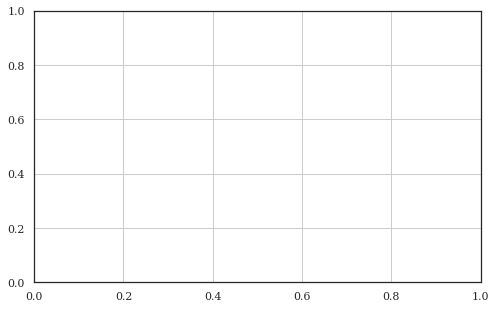

In [71]:
#result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
result_pickle_list = [result_pickle1,result_pickle1,result_pickle1]
xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
label_list = ['SVI-SM L=10,Q=4', 'SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
color_list = [0,4,7]

# result_pickle_list = [result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
# color_list = [4,7]

fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.xscale('log',basex=10) 
plt.xlabel('time (sec)',fontsize = 20)
plt.ylabel('ELBO',fontsize = 20)
plt.minorticks_off()

plt.xticks(fontsize = 18)
plt.yticks(np.concatenate([ytick2,ytick3]),fontsize = 18)
plt.legend(loc='center right',fontsize = 15)
#plt.legend(loc='lower right',fontsize = 15)

fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_time_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()






fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))


plt.xlabel('time (sec)',fontsize = 20)
plt.ylabel('ELBO',fontsize = 20)
plt.minorticks_off()
plt.xticks(fontsize = 18)
plt.yticks(np.concatenate([ytick2,ytick3]),fontsize = 18)
plt.legend(loc='center right',fontsize = 15)

plt.minorticks_off()


fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




In [ ]:
result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
label_list = ['SVI-SM L=10,Q=4', 'SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
color_list = [0,4,7]

# result_pickle_list = [result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
# color_list = [4,7]

fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.xlabel('iteration',fontsize = 20)
plt.ylabel('ELBO',fontsize = 20)
plt.minorticks_off()

plt.xticks(fontsize = 18)
plt.yticks(np.concatenate([ytick2,ytick3]),fontsize = 18)


plt.legend(loc='center right',fontsize = 15)
#plt.legend(loc='lower right',fontsize = 15)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_iter'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




In [ ]:
# figsiz = (8,5) 
# labelsiz = 15
# fontsiz = 15
# interval = 0.2




# fig,axs =  plt.subplots( nrows=1, ncols=2,figsize = figsiz  , gridspec_kw={'hspace': 0.1} )
# ax1,ax2 = axs[0],axs[1]
    
# result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
# color_list = [0,4,7]
# fig = plt.figure(figsize = figsiz)
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax1.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax1.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# ax1.set_xscale('log',basex=10) 
# ax1.set_xlabel('log10 time (sec)',fontsize = 15)
# ax1.set_ylabel('training accuracy',fontsize = 15)
# # ax1.set_xticks(fontsize = 15)
# # ax1.set_yticks(fontsize = 15)

# ax1.tick_params( labelsize=13)

# ax1.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)

# # fig.tight_layout()    
# # plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# # plt.show()
    
    
    
    
    
# result_pickle_list = [result_pickle4, result_pickle3 , result_pickle6 ]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM L=10,Q=5','SVI-SM-RF L=10,Q=4,R=0.2' ,'SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [10,7,8]
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax2.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax2.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
    
# ax2.set_xscale('log',basex=10) 
# ax2.set_xlabel('log10 time (sec)',fontsize = 15)
# ax2.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)
# ax2.tick_params( labelsize=13)




# fig.tight_layout()    
# plt.show()
# plt.savefig(save_figure_path + 'train_accuracy_together'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')


In [ ]:



# result_pickle_list = [result_pickle3 , result_pickle6]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.2' ,'SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [7,8]

# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
    
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xlabel('iteration',fontsize = fontsiz)
# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time2'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()




# result_pickle_list = [result_pickle2 , result_pickle5]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.1' ,'SVI-SM-RF L=10,Q=5,R=0.1']
# color_list = [4,7]
# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
    
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xlabel('iteration',fontsize = fontsiz)
# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time3'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()


In [ ]:
# figsiz = (8,5) 
# labelsiz = 15
# fontsiz = 15
# interval = 0.2

# fig,axs =  plt.subplots( nrows=1, ncols=2,figsize = figsiz  , gridspec_kw={'hspace': 0.1} )
# ax1,ax2 = axs[0],axs[1]


    
# result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
# color_list = [0,4,7]
# fig = plt.figure(figsize = figsiz)
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax1.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax1.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# ax1.set_xscale('log',basex=10) 
# ax1.set_xlabel('log10 time (sec)',fontsize = 15)
# ax1.set_ylabel('training accuracy',fontsize = 15)
# # ax1.set_xticks(fontsize = 15)
# # ax1.set_yticks(fontsize = 15)

# ax1.tick_params( labelsize=12)
# ax1.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)
    
# result_pickle_list = [result_pickle4, result_pickle3 , result_pickle6 ]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM L=10,Q=5','SVI-SM-RF L=10,Q=4,R=0.2' ,'SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [10,7,8]
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax2.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax2.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
    
# ax2.set_xscale('log',basex=10) 
# ax2.set_xlabel('log10 time (sec)',fontsize = 15)
# ax2.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)




# fig.tight_layout()    

# plt.savefig(save_figure_path + 'elbo_progress_iter_together'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()

In [ ]:
result_pickle_list = [result_pickle2,result_pickle3,result_pickle4,result_pickle5]
xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
label_list = [ 'SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' , 'SVI-SM-RF L=10,Q=5,R=0.1' , 'SVI-SM-RF L=10,Q=5,R=0.2']
color_list = [1,4,7,10,13,15]


fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('elbo',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
#plt.xlim([0,51])
plt.legend(loc='lower right',fontsize = 15)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xlabel('time (sec)',fontsize = fontsiz)
# #plt.xlim([0,51])
# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()


# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xscale('log',basex=10) 
# plt.xlabel('log10 time (sec)',fontsize = 18)

# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()

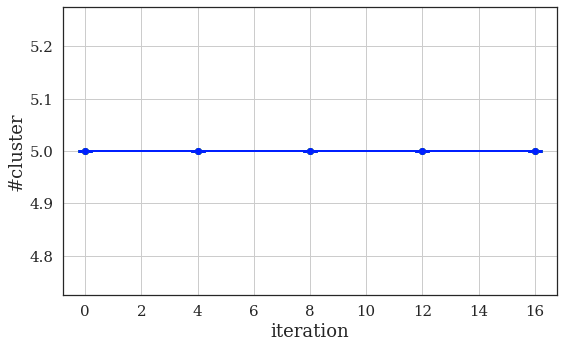

In [72]:
# result_pickle_list = [  result_pickle2  ,result_pickle3 ,result_pickle4   ]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['RRFF .05', 'RRFF .1', 'RRFF .2' , 'RRFF .3'  ]
# color_list = [1,4,7]

interim = 4

fig = plt.figure(figsize = figsiz)
for ith,(train_time_mean, y_train_mean,y_train_std,ith_label,colot_ith) in enumerate(zip(xtick_list ,num_cluster_mean_list,num_cluster_std_list,label_list,color_list )):
    plt.errorbar(train_time_mean[::interim] ,y_train_mean[::interim],yerr=y_train_std[::interim], color =  current_palette[colot_ith] , capsize =7 , capthick=3, fmt ='o-', linewidth = 2.0 ,label = ith_label)


#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)    
#     plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 

plt.ylabel('#cluster',fontsize = 18)
plt.xlabel('iteration',fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.ylim([])
#plt.legend(loc='lower right',fontsize = 15,ncol =4)
fig.tight_layout()    
plt.savefig(save_figure_path + 'train_num_cluster'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

### single

In [79]:
result_pickle = result_pickle
result_pickle['test_accuracy_list']

[array([0.41, 0.39, 0.42, 0.41, 0.41, 0.4 , 0.42, 0.41, 0.43, 0.44, 0.41,
        0.49, 0.42, 0.4 , 0.41, 0.47, 0.41, 0.41, 0.43, 0.38]),
 array([0.36, 0.4 , 0.41, 0.39, 0.46, 0.48, 0.48, 0.46, 0.44, 0.47, 0.48,
        0.45, 0.46, 0.43, 0.46, 0.45, 0.43, 0.52, 0.42, 0.5 ])]

In [80]:
chosen_idx = np.asarray(result_pickle['test_accuracy']).argmax()
#chosen_idx = 1
model_name = result_pickle['HMMGP_setting']['train'] + str(result_pickle['HMMGP_setting']['Len_Batch'])  + '_' + result_pickle['HMMGP_setting']['emission'] + '_score' + str(int(100*result_pickle['test_accuracy'][chosen_idx]))
model_name

KeyError: 'test_accuracy'

In [82]:
x_train = np.asarray(result_pickle['Data_setting']['x_train'])
y_train = np.asarray(result_pickle['Data_setting']['y_train'])
z_train = np.asarray(result_pickle['Data_setting']['z_train']) - 1
x_test = np.asarray(result_pickle['Data_setting']['x_test'])
y_test = np.asarray(result_pickle['Data_setting']['y_test'])
z_test = np.asarray(result_pickle['Data_setting']['z_test']) - 1

num_train = len(x_train)
num_test = len(x_test)

In [83]:
train_time_mean = np.asarray(result_pickle['train_time']).cumsum(axis = 1).mean(axis = 0)
y_train_elbo_mean = np.asarray(result_pickle[ 'train_elbo']).mean(axis = 0)
y_train_elbo_std = np.asarray(result_pickle[ 'train_elbo']).std(axis = 0)

fig = plt.figure(figsize = figsiz)
#plt.errorbar(xtick,y_train_elbo_mean ,yerr=y_train_elbo_std)
plt.plot(train_time_mean,y_train_elbo_mean, color =  current_palette[0]  , linewidth = 3 , label = 'Batch length 10')
plt.fill_between(train_time_mean, y_train_elbo_mean - y_train_elbo_std, y_train_elbo_mean + y_train_elbo_std,
                 alpha=0.5, edgecolor= current_palette[0], facecolor= current_palette[0])

plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('elbo',fontsize = fontsiz)
plt.xlabel('training time (sec)',fontsize = fontsiz)
#plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),ncol = 1)
fig.tight_layout()    
plt.legend(loc = 'lower right', ncol = 1)
plt.show()


KeyError: 'train_elbo'

In [84]:
y_train_accuracy_mean = np.asarray(result_pickle[ 'train_accuracy']).mean(axis = 0)
y_train_accuracy_std = np.asarray(result_pickle[ 'train_accuracy']).std(axis = 0)
fig = plt.figure(figsize = figsiz)
#plt.errorbar(xtick,y_train_elbo_mean ,yerr=y_train_elbo_std)
plt.plot(train_time_mean,y_train_accuracy_mean, color =  current_palette[0]  , linewidth = 3 , label = 'Batch length 10')
plt.fill_between(train_time_mean, y_train_accuracy_mean - y_train_accuracy_std, y_train_accuracy_mean + y_train_accuracy_std,
                 alpha=0.5, edgecolor= current_palette[0], facecolor= current_palette[0])

plt.tick_params(labelsize=labelsiz) 
#plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('accuracy',fontsize = fontsiz)
plt.xlabel('training time (sec)',fontsize = fontsiz)
#plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),ncol = 1)
fig.tight_layout()    
plt.legend(loc = 'lower right', ncol = 1)
plt.show()

KeyError: 'train_accuracy'

In [85]:
x_train = np.asarray(result_pickle['Data_setting']['x_train'])
y_train = np.asarray(result_pickle['Data_setting']['y_train'])
z_train = np.asarray(result_pickle['Data_setting']['z_train']) - 1
x_test = np.asarray(result_pickle['Data_setting']['x_test'])
y_test = np.asarray(result_pickle['Data_setting']['y_test'])
z_test = np.asarray(result_pickle['Data_setting']['z_test']) - 1

num_train = len(x_train)
num_test = len(x_test)

In [86]:
figsiz2 = (18,2) 
labelsiz = 15
fontsiz = 20
interval = 0.2
#xlimit_range = [30-0.1,80+0.1]
#xlimit_range = [20-0.1,80+0.1]
xlimit_range = [10-0.1,90+0.1]


In [87]:
z_test

array([0, 2, 4, 4, 6, 6, 6, 6, 6, 8, 0, 2, 4, 6, 6, 8, 8, 0, 2, 2, 2, 2,
       4, 6, 8, 0, 2, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 8, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 6, 6, 8, 8, 8, 0, 0, 2, 2, 4,
       6, 8, 8, 8, 0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8,
       0, 2, 4, 4, 6, 8, 0, 0, 0, 2, 4, 6])

In [88]:
z_test_pred = result_pickle['test_pred'][chosen_idx]
revised_order_dict, revised_z_test_pred, _ = _measure_metric(z_test, z_test_pred)
for ith in np.arange(result_pickle['Exp_setting']['Num_HiddenState']):
    if ith not in list(revised_order_dict.keys()):
        revised_order_dict[ith] = ith
revised_z_test_pred = 2*revised_z_test_pred

KeyError: 'test_pred'

No handles with labels found to put in legend.


NameError: name 'model_name' is not defined

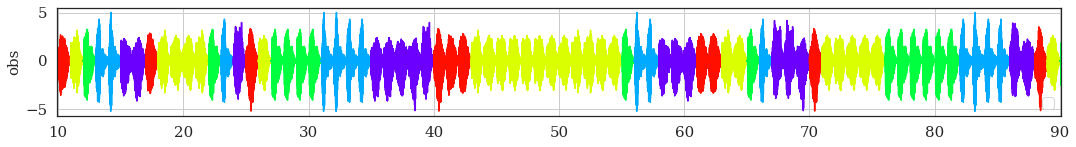

In [89]:

plt.figure(figsize = figsiz2 )
for ith,(ith_x,ith_y,ith_z) in enumerate(zip(x_test,y_test,z_test)):
    #plt.plot( (ith_x + ith) , ith_y , color = current_palette[ith_z])
    plt.plot( ith_x +ith , ith_y , color = current_palette[ith_z])
    #print(ith_x + ith)
    #plt.plot(ith + ith_x, ith_y , color = current_palette[ith_z])

#plt.title('true')
plt.tick_params(labelsize=labelsiz) 
plt.xlim(xlimit_range)

plt.ylabel('obs',fontsize = 15)
#plt.xlabel('time',fontsize = fontsiz)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
plt.legend(loc='lower right',fontsize = 15)
fig.tight_layout()    

plt.savefig(save_figure_path + model_name + '_true' + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()



In [ ]:
plt.figure(figsize = figsiz2 )
for ith,(ith_x,ith_y,ith_z) in enumerate( zip(x_test,y_test,revised_z_test_pred)):
#for ith,(ith_x,ith_y,ith_z) in enumerate( zip(x_test,y_test,z_test_pred)):
    plt.plot( ith_x +ith, ith_y , color = current_palette[ith_z])

plt.tick_params(labelsize=labelsiz) 
plt.xlim(xlimit_range)

plt.ylabel('obs',fontsize = fontsiz)
# plt.xlabel('time',fontsize = fontsiz)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
plt.legend(loc='lower right',fontsize = 15)
fig.tight_layout()    

plt.savefig(save_figure_path + model_name + '_pred'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

save_figure_path + model_name + '_pred'

/home/yohan/Myenv/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


NameError: name 'chosen_idx' is not defined

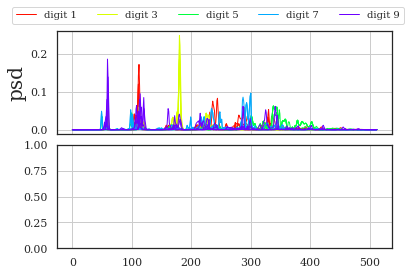

In [90]:
xlim_range = [0-1,512]

from scipy import signal
from scipy import  stats


#figsiz = (8,5) 
figsiz = (6,3)
labelsiz = 15
fontsiz = 15
interval = 0.2

Fs = len(x_train[0])
fig,axs =  plt.subplots( 2, sharex=True , gridspec_kw={'hspace': 0.1})
ax1,ax2 = axs[0],axs[1]


for ith_z in range(10):
    #print(np.where(z_train==ith_z)[0][:3])
    for j,jth in enumerate(np.where(z_train==ith_z)[0][:5]):
        freqs, psd = signal.welch(y_train[jth], fs= Fs ,nperseg= len(y_train[jth]) )        
        if j == 0:
            ax1.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1 ,alpha = 1.0 ,label = 'digit ' + str(ith_z + 1) )
        else:
            ax1.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1 , alpha = 1.0  )
    
#ax1.legend(loc='upper out',ncol = 3 ,fontsize = 10)
#ax1.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0 ,ncol = 5 ,fontsize = 10)
#ax1.legend(bbox_to_anchor=(1.04,0.5), loc="lower left", borderaxespad=0 ,ncol = 1 ,fontsize = 10)
#ax1.legend(loc="left", borderaxespad=0 ,ncol = 1 ,fontsize = 10)
ax1.legend(bbox_to_anchor=(-0.15,1.02,1,0), loc="lower left", borderaxespad= .5 ,ncol = 5 ,fontsize = 10)

#ax1.set_ylim([0,0.4])
fig.tight_layout()    
ax1.set_ylabel('psd',fontsize = 20)



current_iter = result_pickle['HMMGP_setting']['Iter_train']-1 
x = np.arange(512)
for ith_emission in range(result_pickle['Exp_setting']['Num_HiddenState']):
    a = 0
    for ith_weight,ith_mu,ith_std in zip(result_pickle['paramhistory_dict'][chosen_idx]['weight'][current_iter][ith_emission],
                                         result_pickle['paramhistory_dict'][chosen_idx]['mu'][current_iter][ith_emission],
                                         result_pickle['paramhistory_dict'][chosen_idx]['std'][current_iter][ith_emission]) :
        a += .5*ith_weight* (stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2))
    try : 
        #ax2.plot(x, a , color = current_palette[revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
        ax2.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*revised_order_dict[ith_emission]+1))        
    except:
        #ax2.plot(x, a , color = current_palette[ith_emission] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
        ax2.plot(x, a , color = current_palette[2*ith_emission] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*ith_emission+1))  
#        ax2.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))        
        
#ax2.set_ylim([0,0.6])
ax2.set_xlabel('Hz ',fontsize = 18)
ax2.set_ylabel('S(s)',fontsize = 18)
plt.xticks(fontsize = 15)
plt.xlim(xlim_range)


fig.tight_layout()    
plt.savefig(save_figure_path + model_name + '_psd_toegether'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()



In [ ]:

# from scipy import signal
# #figsiz = (8,5) 
# figsiz = (6,3)
# labelsiz = 15
# fontsiz = 15
# interval = 0.2

# xlim_range = [0-1,512]
# Fs = len(x_train[0])
# fig = plt.figure(figsize = figsiz)    
# #for ith,(ith_x,ith_y,ith_z) in enumerate(zip(x_train,y_train,z_train)):
# for ith_z in range(10):
#     #print(np.where(z_train==ith_z)[0][:3])
#     for j,jth in enumerate(np.where(z_train==ith_z)[0][:3]):
#         freqs, psd = signal.welch(y_train[jth], fs= Fs ,nperseg= len(y_train[jth]) )        
#         if j == 0:
#             plt.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1.5 ,alpha = .9 ,label = 'digit ' + str(ith_z + 1) )
#         else:
#             plt.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1.5 , alpha = .9  )
            
    
# plt.xlabel('Hz ',fontsize = 18)
# plt.ylabel('Psd',fontsize = 18)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.xlim(xlim_range)

# #plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
# plt.legend(loc='upper right',fontsize = 12)
# fig.tight_layout()    

# plt.savefig(save_figure_path + model_name + '_psd'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()


In [ ]:
#revised_order_dict.keys(),revised_order_dict.values()

In [ ]:
# from scipy import signal
# # from scipy import  stats


# #figsiz = (8,5) 
# figsiz = (6,3)
# labelsiz = 15
# fontsiz = 15
# interval = 0.2
# iter_list = np.arange(0,70,10)


# for current_iter in iter_list:

#     figure = plt.figure(figsize = figsiz)
#     for ith_emission in range(result_pickle['Exp_setting']['Num_HiddenState']):
# #     #for ith_emission in revised_z_test_pred:
# #         a = 0
# #         for ith_weight,ith_mu,ith_std in zip(result_pickle['paramhistory_dict'][chosen_idx]['weight'][current_iter][ith_emission],
# #                                              result_pickle['paramhistory_dict'][chosen_idx]['mu'][current_iter][ith_emission],
# #                                              result_pickle['paramhistory_dict'][chosen_idx]['std'][current_iter][ith_emission]) :

# #             a += .5*ith_weight* (stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2))

            
#         #plt.plot(x, a , color = current_palette[ith_emission ] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
#         a = 0
#         for ith_weight,ith_mu,ith_std in zip(result_pickle['paramhistory_dict'][chosen_idx]['weight'][current_iter][ith_emission],
#                                              result_pickle['paramhistory_dict'][chosen_idx]['mu'][current_iter][ith_emission],
#                                              result_pickle['paramhistory_dict'][chosen_idx]['std'][current_iter][ith_emission]) :
#             a += .5*ith_weight* (stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2))
#         try : 
#             #ax2.plot(x, a , color = current_palette[revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
#             plt.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*revised_order_dict[ith_emission]+1))        
#         except:
#             #ax2.plot(x, a , color = current_palette[ith_emission] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
#             plt.plot(x, a , color = current_palette[2*ith_emission] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*ith_emission+1))  
#     #        ax2.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))        

#     plt.xlabel('Hz ',fontsize = 18)
#     plt.ylabel('Psd',fontsize = 18)
#     plt.xticks(fontsize = 15)
#     plt.yticks(fontsize = 15)
#     plt.xlim(xlim_range)

#     #plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
#     plt.legend(loc='upper right',fontsize = 15)
#     fig.tight_layout()    

#     #plt.savefig(save_figure_path + model_name + '_psd'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
#     plt.show()

In [ ]:
trained_A = result_pickle['Trained_Model'][chosen_idx].var_param_A
trained_A = trained_A/trained_A.sum(axis = 1,keepdims = True)

ordered_A = []
for ith in revised_order_dict:
    ordered_A.append(trained_A[ith])
ordered_A = np.asarray(ordered_A)



In [ ]:
figsiz3 = (10,10) 
labelsiz = 15
fontsiz = 20
interval = 0.2
fig = plt.figure(figsize = figsiz3)
#plt.matshow(ordered_A,  cmap='viridis')
plt.imshow(trained_A, cmap='viridis')
#plt.matshow(trained_A , cmap='viridis')
plt.ylabel('x_{t-1}',fontsize = fontsiz)
plt.xlabel('x_{t}',fontsize = fontsiz)
plt.colorbar()
fig.tight_layout()   
plt.show()

In [ ]:
ordered_A[3]

In [ ]:
figsiz3 = (10,10) 
labelsiz = 15
fontsiz = 20
interval = 0.2
fig = plt.figure(figsize = figsiz3)
plt.imshow(ordered_A,  cmap='viridis')
plt.ylabel('x_{t-1}',fontsize = fontsiz)
plt.xlabel('x_{t}',fontsize = fontsiz)
plt.colorbar()
fig.tight_layout()   
plt.show()

In [ ]:
from scipy import signal
from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt
%matplotlib inline 


def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [ ]:
np.unique(z_train)

In [ ]:
save_figure_path

In [ ]:
from scipy import signal
figsiz = (6,3) 
labelsiz = 15
fontsiz = 15
interval = 0.2


for ith_z in np.unique(z_train):
    Fs = len(x_train[0])
    a = np.where(z_train==ith_z)[0][3]

    fig = plt.figure(figsize = figsiz)    
    plt.plot(x_train[a],y_train[a] , color = 'blue' , linewidth = 1.2 ,alpha = .9 ,label = 'digit ' + str(ith_z + 1 ) )

    #plt.xlabel('Time',fontsize = 18)
    #plt.ylabel('',fontsize = 18)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    #plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
    plt.legend(loc='upper right',fontsize = 15)
    fig.tight_layout()    

    plt.savefig(save_figure_path + 'signal_' +  str(ith_z + 1 )   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()